<h2 style="text-align: center;">👣 Tasa de natalidad (por 1000 habitantes) </h2>


**📊 Código del indicador WB:** `SP.DYN.CBRT.IN`

**👶 Enfoque de análisis:**  👶 
La tasa de natalidad es un indicador clave para comprender la dinámica poblacional de una región.
En el caso de Sudamérica, esta métrica refleja no solo el crecimiento demográfico, sino también aspectos culturales, económicos y de acceso a servicios de salud reproductiva. Una tasa de natalidad elevada puede estar asociada a poblaciones jóvenes, menor acceso a métodos anticonceptivos o diferencias en políticas familiares, mientras que una tasa baja puede indicar transiciones demográficas avanzadas, urbanización y cambios en las prioridades sociales y económicas.

Este indicador nos permite observar cómo los avances (o retrocesos) en educación, salud reproductiva y condiciones socioeconómicas impactan directamente en los patrones de nacimiento dentro de una población.
La tasa de natalidad revela cómo las decisiones familiares, el acceso a servicios de planificación y el contexto cultural influyen en el crecimiento demográfico de una región.

**📌 Región de análisis:** Sudamérica  
**🧩 Relación clave:** Desnutrición ⟶ contextos de pobreza ⟶ alta tasa de natalidad


### CODIGO PARA OBTENER LOS DATOS DE TASA DE NATALIDAD Y DESNUTRICIÓN EN SUDAMÉRICA

In [9]:
# IMPORTACIONES DE LIBRERÍAS
import requests                    # Para conectarse a la API del Banco Mundial
import pandas as pd               # Para manejar y limpiar los datos
import matplotlib.pyplot as plt   # Para crear los gráficos
from bs4 import BeautifulSoup     # Por si la respuesta no es JSON válido

# OBTENER TODOS LOS PAÍSES DESDE LA API DEL BANCO MUNDIAL
url = "http://api.worldbank.org/v2/country?format=json&per_page=400"  # URL para obtener países
response = requests.get(url)# Hace la solicitud GET
data = response.json() # Convierte la respuesta en JSON

# Lista de países sudamericanos por nombre (usaremos esto para filtrar)
sudamerica_nombres = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
    "Paraguay", "Peru", "Uruguay", "Venezuela"
]

# Filtrar solo los países sudamericanos: {código: nombre}
paises = {} #Crea un diccionario vacío
for pais in data[1]: #Recorre cada elemento de data
    if pais["name"] in sudamerica_nombres: #Verifica si el nombre del país está en la lista sudamerica_nombres
        paises[pais["id"]] = pais["name"] #Si el pais está se agrega al diccionario paises

# DEFINIR INDICADORES A CONSULTAR EN LA API 
indicadores = {
    "SP.DYN.CBRT.IN": "Tasa de Natalidad (por 1000 habitantes)", # Nacimientos por cada 1000 personas
    "SN.ITK.DEFC.ZS": "Desnutrición (%)" # % de personas con desnutrición
}
fecha = "2000:2024" # Rango de años a consultar

# FUNCIÓN PARA CONSULTAR LA API POR PAÍS E INDICADOR
def obtener_datos(pais, indicador):
    # Construir la URL para ese país e indicador
    url = f"http://api.worldbank.org/v2/country/{pais}/indicator/{indicador}?format=json&date={fecha}&per_page=100"
    r = requests.get(url)  # Realiza la solicitud

    try:
        data = r.json()  # Intenta convertir la respuesta a JSON
    except:
        # Si no es JSON (ej. error HTML), se usa BeautifulSoup para ver el error
        soup = BeautifulSoup(r.text, "html.parser")
        print(f"Error en país {pais} - indicador {indicador}")
        return pd.DataFrame()  # Devuelve un DataFrame vacío

    # Si hay datos válidos (más de un elemento)
    if len(data) > 1:
        datos = [
            {
                "País": paises[pais],                  # Nombre del país
                "Año": int(d["date"]),                 # Año como entero
                "Valor": d["value"],                   # Valor del indicador
                "Indicador": indicadores[indicador]    # Nombre legible del indicador
            }
            for d in data[1] if d["value"] is not None  # Solo incluir datos válidos
        ]
        return pd.DataFrame(datos)  # Devuelve los datos como DataFrame
    else:
        return pd.DataFrame()  # Si no hay datos, retorna DataFrame vacío



# OBTENER DATOS DE TODOS LOS PAÍSES E INDICADORES
dfs = []  # Lista vacía para guardar los dataframes
for codigo_pais in paises:  # Para cada país sudamericano
    for indicador in indicadores:  # Para cada indicador
        df_temp = obtener_datos(codigo_pais, indicador)  # Obtener los datos desde la API
        dfs.append(df_temp)  # Agregar el DataFrame a la lista


# UNIR TODOS LOS DATAFRAMES EN UNO SOLO
df = pd.concat(dfs, ignore_index=True)

# TRANSFORMAR A FORMATO ANCHO
df_pivot = df.pivot_table(index=["Año", "País"], columns="Indicador", values="Valor").reset_index()
df_pivot = df_pivot.sort_values(["País", "Año"]) # Ordenar por país y año

# FILTRAR SOLO LOS AÑOS DE 2018 A 2024
df_filtrado = df_pivot[(df_pivot["Año"] >= 2018) & (df_pivot["Año"] <= 2024)]

# MOSTRAR EL RESULTADO FILTRADO
df_filtrado


Indicador,Año,País,Desnutrición (%),Tasa de Natalidad (por 1000 habitantes)
162,2018,Argentina,3.5,15.332
171,2019,Argentina,3.5,13.902
180,2020,Argentina,3.4,11.799
189,2021,Argentina,3.3,11.682
198,2022,Argentina,3.2,10.926
207,2023,Argentina,NaN,11.064
163,2018,Bolivia,14.5,22.574
172,2019,Bolivia,14.5,22.257
181,2020,Bolivia,16.9,21.996
190,2021,Bolivia,20.3,21.808


### BASE DE DATOS

In [10]:
# GUARDAR EL RESULTADO EN UN ARCHIVO EXCEL
df_filtrado.to_excel("Tasa_natalidad_y_desnutricion_2018_2024.xlsx", index=False)

## 📊 Análisis: Tasa de natalidad y desnutrición en Sudamérica

Los siguientes gráficos comparan la tasa de natalidad (nacimientos por cada 1,000 habitantes) y los niveles de desnutrición a lo largo del tiempo en países sudamericanos, analizando si el crecimiento poblacional se asocia con mayores carencias nutricionales en la población.

### GRÁFICA DE LINEAS CON DOBLE EJE Y DE LA TASA DE NATALIDAD Y DESNUTRICIÓN EN SUDAMERICA 

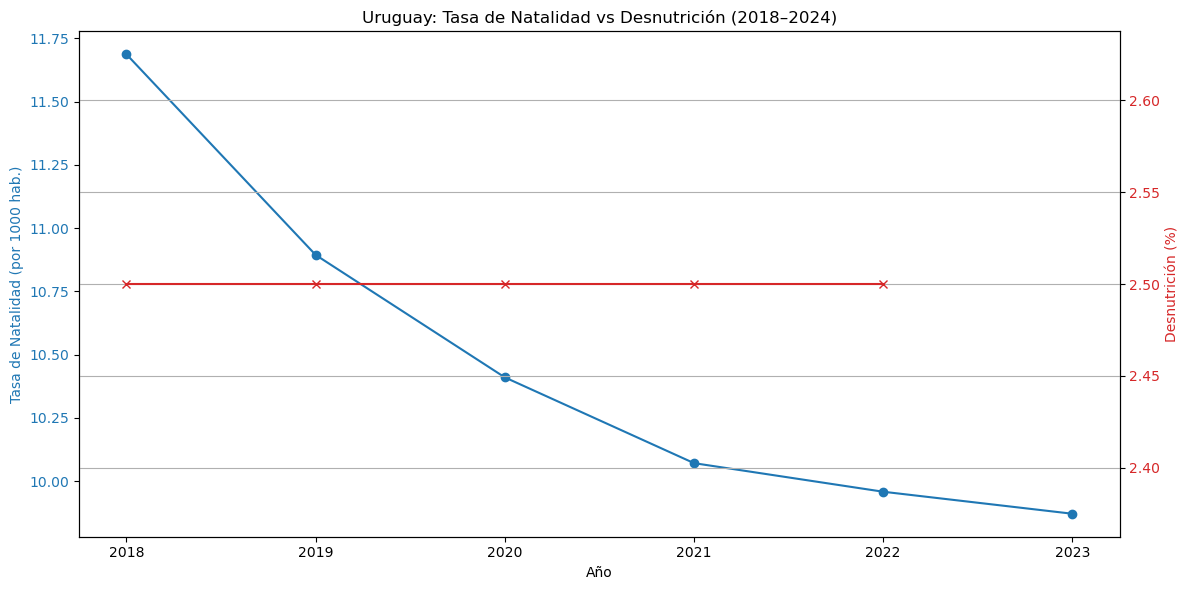

🔎 Mostrando gráfico de Uruguay. Presiona ENTER para continuar... 


In [20]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
from IPython.display import clear_output  # Necesario para limpiar la salida

# GRAFICAR POR PAÍS (solo de 2018 a 2024)
for pais in df_filtrado["País"].unique():  # Recorre cada país único del DataFrame filtrado
    datos_pais = df_filtrado[df_filtrado["País"] == pais]  # Filtra los datos solo para ese país

    clear_output(wait=True)  # Limpia la salida del gráfico anterior

    fig, ax1 = plt.subplots(figsize=(12, 6))  # Crea la figura y el eje izquierdo con tamaño personalizado
    ax1.set_title(f"{pais}: Tasa de Natalidad vs Desnutrición (2018–2024)")  # Título con nombre del país

    # EJE IZQUIERDO: Tasa de natalidad
    ax1.set_xlabel("Año")  # Etiqueta del eje X
    ax1.set_ylabel("Tasa de Natalidad (por 1000 hab.)", color="tab:blue")  # Etiqueta del eje Y izquierdo en azul

    # Gráfico de línea para la Tasa de Natalidad
    ax1.plot(
        datos_pais["Año"],  # Eje X: años
        datos_pais["Tasa de Natalidad (por 1000 habitantes)"],  # Eje Y: valores de natalidad
        color="tab:blue",  # Color azul para natalidad
        marker='o'  # Marca circular en cada punto
    )
    ax1.tick_params(axis="y", labelcolor="tab:blue")  # Los números del eje Y izquierdo también en azul

    # EJE DERECHO: Desnutrición
    ax2 = ax1.twinx()  # Crea un segundo eje Y compartiendo el mismo eje X
    ax2.set_ylabel("Desnutrición (%)", color="tab:red")  # Etiqueta del eje derecho en rojo

    # Gráfico de línea para la Desnutrición
    ax2.plot(
        datos_pais["Año"],  # Eje X: años
        datos_pais["Desnutrición (%)"],  # Eje Y derecho: valores de desnutrición
        color="tab:red",  # Línea roja para desnutrición
        marker='x'  # Marca en forma de "x"
    )
    ax2.tick_params(axis="y", labelcolor="tab:red")  # Números del eje Y derecho en rojo

    plt.grid(True)  # Activa las líneas de cuadrícula 
    plt.tight_layout()  # Ajusta automáticamente el diseño para evitar solapamiento
    plt.show()  # Muestra el gráfico para el país actual

    # Pausa hasta que el usuario presione ENTER y pase al siguiente gráfico
    input(f"🔎 Mostrando gráfico de {pais}. Presiona ENTER para continuar...")


### LINEA DE TIEMPO DE LA TASA DE NATALIDAD EN SUDAMERICA 

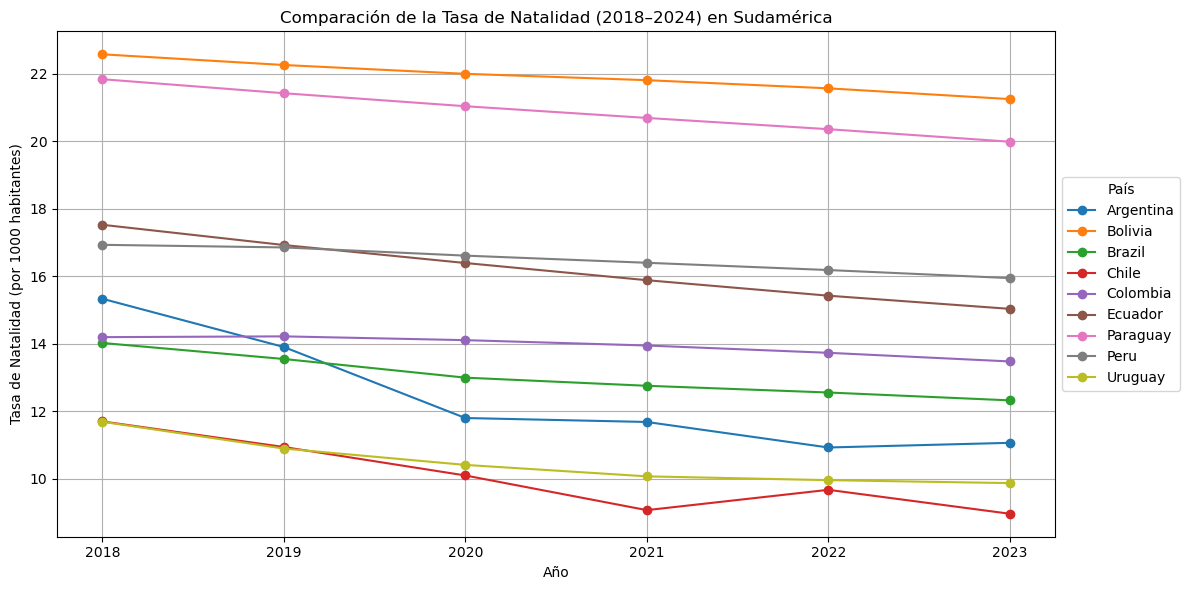

In [16]:
# Se importa la librería matplotlib para graficar 
import matplotlib.pyplot as plt 

# Pivot para tener una columna por país
df_natalidad = df_filtrado.pivot(
    index="Año",                      # Las filas serán los años
    columns="País",                   # Cada país se convertirá en una columna
    values="Tasa de Natalidad (por 1000 habitantes)"  # El valor que irá en la tabla será la tasa de natalidad
)

# Crear la figura
plt.figure(figsize=(12, 6))  # Se define el tamaño del gráfico (ancho: 12, alto: 6)

# Graficar una línea por cada país
for pais in df_natalidad.columns:  # Recorre todos los países (columnas del DataFrame)
    plt.plot(
        df_natalidad.index,       # Eje X: los años
        df_natalidad[pais],       # Eje Y: los valores de natalidad para ese país
        marker='o',               # Dibuja círculos en cada punto
        label=pais                # Etiqueta para la leyenda
    )

# Personalizar el gráfico
plt.title("Comparación de la Tasa de Natalidad (2018–2024) en Sudamérica")  # Título principal
plt.xlabel("Año")  # Etiqueta del eje X
plt.ylabel("Tasa de Natalidad (por 1000 habitantes)")  # Etiqueta del eje Y

plt.legend(
    title="País",                   # Título de la leyenda
    loc="center left",             # Posición de la leyenda: centrado a la izquierda
    bbox_to_anchor=(1, 0.5)        #  Coloca la leyenda fuera del gráfico, a la derecha
)

plt.grid(True)         # Agrega líneas de cuadrícula
plt.tight_layout()     # Ajusta automáticamente los márgenes para evitar que se corten elementos


### LINEA DE TIEMPO INTERACTIVA DE LA TASA DE NATALIDAD EN SUDAMERICA 

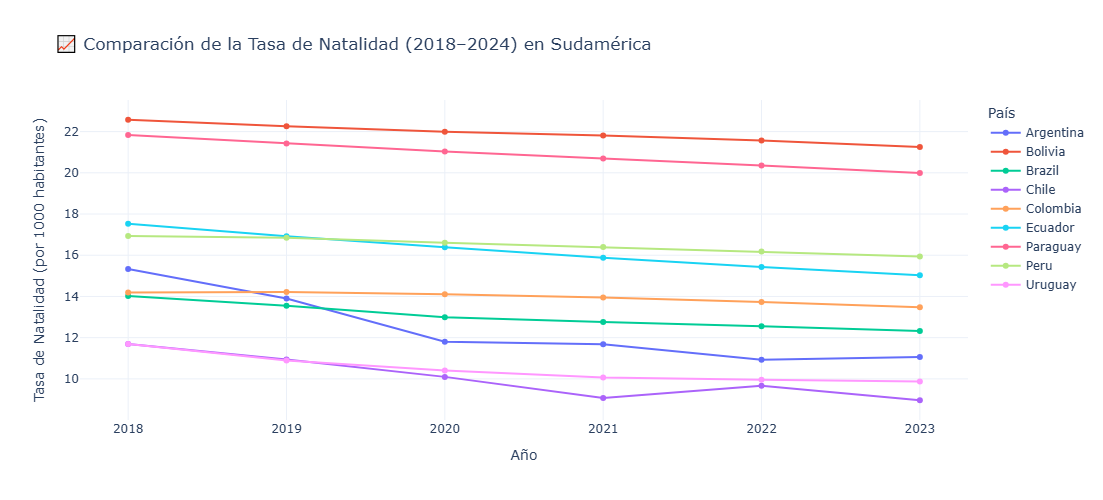

In [15]:
 #  Importa la librería Plotly Express
import plotly.express as px  

# Reorganiza el DataFrame a formato largo y elimina valores nulos
df_largo = df_filtrado[["Año", "País", "Tasa de Natalidad (por 1000 habitantes)"]].dropna()

# Crear gráfico de líneas interactivo con Plotly
fig = px.line(
    df_largo,                                       # DataFrame a graficar
    x="Año",                                        # Eje X: años
    y="Tasa de Natalidad (por 1000 habitantes)",    # Eje Y: tasa de natalidad
    color="País",                                   # Color diferente por cada país
    markers=True,                                   # Muestra puntos (marcadores) en cada año
    title="📈 Comparación de la Tasa de Natalidad (2018–2024) en Sudamérica"  # Título del gráfico
)

# Personalización adicional del gráfico
fig.update_layout(
    xaxis_title="Año",                                       # Título del eje X
    yaxis_title="Tasa de Natalidad (por 1000 habitantes)",   # Título del eje Y
    legend_title="País",                                     # Título de la leyenda
    template="plotly_white",                                 # Estilo visual claro y limpio
    width=900,                                               # Ancho del gráfico en píxeles
    height=500                                               # Alto del gráfico en píxeles
)

# Mostrar el gráfico interactivo 
fig.show()


### LINEA DE TIEMPO INTERACTIVA ANIMADA DE LA TASA DE NATALIDAD EN SUDAMERICA 

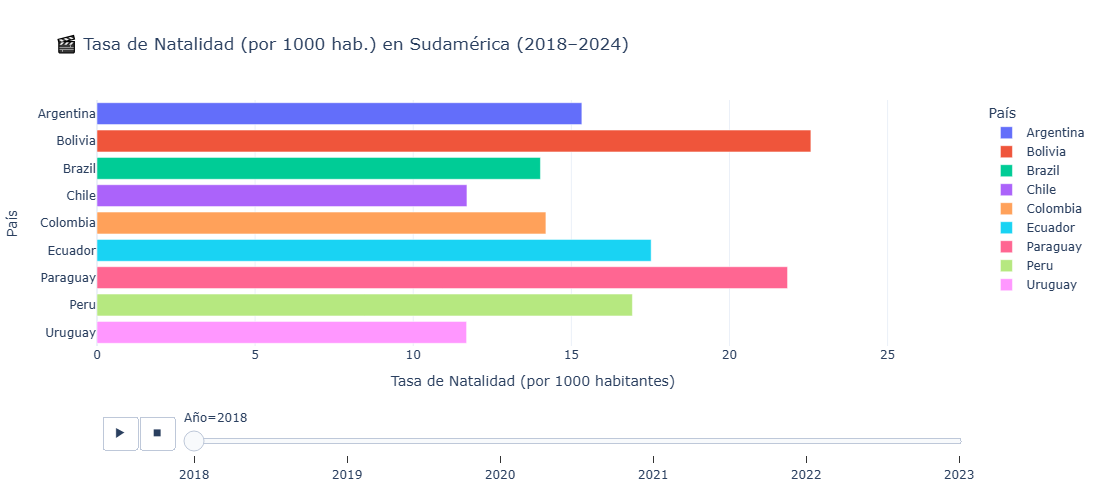

In [14]:
# Importamos Plotly Express para gráficos interactivos
import plotly.express as px  

# Seleccionamos solo las columnas necesarias y eliminamos los valores nulos
df_anim = df_filtrado[["Año", "País", "Tasa de Natalidad (por 1000 habitantes)"]].dropna()

# Crear gráfico de barras horizontales animadas
fig = px.bar(
    df_anim,                                # DataFrame de entrada
    x="Tasa de Natalidad (por 1000 habitantes)",  # Longitud de la barra (eje X)
    y="País",                               # País en eje Y (barras horizontales)
    color="País",                           # Color diferente por país
    orientation='h',                        # Esto indica que las barras son horizontales
    animation_frame="Año",                  # Frame de animación: se actualiza por año
    range_x=[0, df_anim["Tasa de Natalidad (por 1000 habitantes)"].max() + 5],  # Ajusta el rango del eje X
    title="🎬 Tasa de Natalidad (por 1000 hab.) en Sudamérica (2018–2024)"  # Título del gráfico
)

# Personalizamos el gráfico
fig.update_layout(
    xaxis_title="Tasa de Natalidad (por 1000 habitantes)",  # Etiqueta del eje X
    yaxis_title="País",                                     # Etiqueta del eje Y
    template="plotly_white",                                # Estilo limpio y profesional
    width=800,                                              # Ancho del gráfico
    height=500                                              # Alto del gráfico
)

# Mostrar gráfico animado e interactivo
fig.show()



### ANÁLISIS DESCRIPTIVO 
Un análisis descriptivo del indicador "Tasa de natalidad" en Sudamérica, específicamente entre los años 2018 y 2024.

In [19]:

# 1. Agrupar los datos por país y calcular el promedio de la Tasa de Natalidad
promedios = df_filtrado.groupby("País")["Tasa de Natalidad (por 1000 habitantes)"].mean().reset_index()

# 2. Ordenar los países de mayor a menor según su tasa promedio de natalidad
promedios = promedios.sort_values(by="Tasa de Natalidad (por 1000 habitantes)", ascending=False)

# 3. Mostrar el DataFrame con los promedios ordenados
print(promedios)


        País  Tasa de Natalidad (por 1000 habitantes)
1    Bolivia                                21.908000
6   Paraguay                                20.887167
7       Peru                                16.486333
5    Ecuador                                16.196000
4   Colombia                                13.945333
2     Brazil                                13.032667
0  Argentina                                12.450833
8    Uruguay                                10.481833
3      Chile                                10.073333


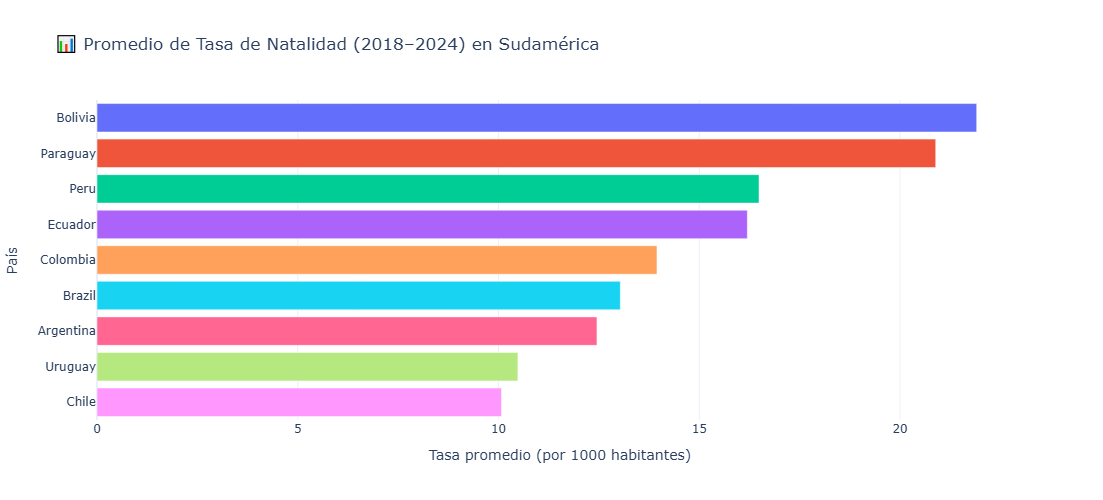

In [22]:
import plotly.express as px  # Importa la librería Plotly Express para crear gráficos interactivos

# 1. Agrupar por país y calcular el promedio de la Tasa de Natalidad
promedios = df_filtrado.groupby("País")["Tasa de Natalidad (por 1000 habitantes)"].mean().reset_index()

# 2. Ordenar de mayor a menor tasa
promedios = promedios.sort_values(by="Tasa de Natalidad (por 1000 habitantes)", ascending=False)

# 3. Crear gráfico de barras horizontales
fig = px.bar(
    promedios,  # DataFrame que contiene los promedios por país
    x="Tasa de Natalidad (por 1000 habitantes)",  # Eje X: la tasa promedio
    y="País",  # Eje Y: los nombres de los países
    orientation='h',  # Barras horizontales
    title="📊 Promedio de Tasa de Natalidad (2018–2024) en Sudamérica",  # Título del gráfico
    labels={"Tasa de Natalidad (por 1000 habitantes)": "Tasa de Natalidad"},  # Etiqueta personalizada
    color="País",  # Cada país tendrá un color distinto automáticamente
)

# 4. Personalización adicional del diseño
fig.update_layout(
    xaxis_title="Tasa promedio (por 1000 habitantes)",  # Etiqueta del eje X
    yaxis_title="País",  # Etiqueta del eje Y
    template="plotly_white",  # Fondo blanco limpio
    height=500,  # Altura del gráfico
    showlegend=False  # Oculta la leyenda (ya está en el eje Y)
)

# 5. Mostrar el gráfico interactivo
fig.show()


### 📌 CONCLUSIONES 

1. 📈 Bolivia lidera en natalidad:
Con un promedio de 21.91 nacimientos por cada 1000 habitantes, Bolivia tiene la tasa de natalidad más alta del grupo. Esto sugiere una población más joven o en crecimiento acelerado.

2. 📊 Paraguay y Perú también destacan:
Paraguay (20.89) y Perú (16.49) mantienen tasas relativamente altas, indicando que siguen siendo países con estructuras poblacionales más jóvenes.

3. 📉 Chile y Uruguay tienen las tasas más bajas:
Chile (10.07) y Uruguay (10.48) presentan las tasas de natalidad más reducidas.

4. 🏙️ Caída general en países más desarrollados:
Países con mayor desarrollo como Argentina (12.45), Brasil (13.03) y Colombia (13.95) muestran una tendencia hacia tasas más bajas.

5. 🧮 Desigualdad demográfica en la región:
Las diferencias entre países reflejan una transición demográfica desigual. Algunos aún se encuentran en etapas de alta natalidad, mientras que otros ya enfrentan desafíos de envejecimiento poblacional.